This is a workbook analysing StackOverflow Yearly Survey Results

In [15]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# %matplotlip inline

# libraries
import numpy as np
import matplotlib.pyplot as plt


from scipy.stats import ttest_ind # library to perform t-test

In [16]:
# loading data

df = pd.read_csv('survey-results-public.csv')
df.shape

(51392, 154)

In [17]:
# remove rows with no gender information

df = df.dropna(subset = ['Gender'], axis = 0)
df.shape

(35047, 154)

In [18]:
# number of records by gender
df['Gender'].value_counts()

# re-categorise gender field to 'Male', 'Female' and 'Other'
df['Gender'] = np.where(df.Gender == 'Male', 'Male', np.where(df.Gender == 'Female', 'Female', 'Others'))

Male      31589
Female     2600
Others      858
Name: Gender, dtype: int64
Male      0.901332
Female    0.074186
Others    0.024481
Name: Gender, dtype: float64


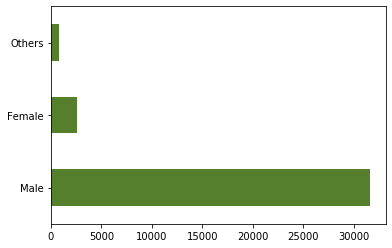

In [19]:
# Simple distribution of Gender Category
print(df['Gender'].value_counts())
print(df['Gender'].value_counts()/df.shape[0])

(df['Gender'].value_counts()).plot(kind = 'barh', color='#557f2d')

In [20]:
print("The % of male survey respondents was {:.2f}".format(sum(df.Gender == 'Male')/df.shape[0]))
print("The % of female survey respondenst was {:.2f}".format(sum(df.Gender == 'Female')/df.shape[0]))

The % of male survey respondents was 0.90
The % of female survey respondenst was 0.07


## Female Rate by Country

In [21]:
#  selecting only countries with at least 1% of all respondents

df_countries = ((df.groupby(['Country'])['Respondent'].count().sort_values(ascending = False)/df.shape[0])>=.01).reset_index()
df_countries = df_countries[df_countries.Respondent == True]

# create a df with only a subset of countries
list_countries = list(df_countries.iloc[:, 0])

subset_df = df[df['Country'].isin(list_countries)]

# print the count by gender
print(subset_df['Gender'].value_counts())

Male      24053
Female     2068
Others      654
Name: Gender, dtype: int64


In [22]:
subset_df.groupby(['Country'])['Respondent'].count().sort_values(ascending= False)

Country
United States         8546
United Kingdom        3259
Germany               2962
India                 2672
Canada                1630
France                1184
Poland                 933
Australia              702
Netherlands            637
Russian Federation     591
Spain                  571
Italy                  537
Brazil                 523
Sweden                 448
Switzerland            427
Romania                403
Israel                 392
Austria                358
Name: Respondent, dtype: int64

In [23]:
# Country and Gender and % of total
groups = subset_df.groupby(['Country', 'Gender'])['Respondent'].count()/subset_df.groupby(['Country'])['Respondent'].count()
groups = groups.reset_index()
groups

,Country,Gender,Respondent
0,Australia,Female,0.056980
1,Australia,Male,0.903134
2,Australia,Others,0.039886
3,Austria,Female,0.064246
4,Austria,Male,0.899441
5,Austria,Others,0.036313
6,Brazil,Female,0.047801
7,Brazil,Male,0.938815
8,Brazil,Others,0.013384
9,Canada,Female,0.092025


In [24]:
groups[groups.Gender == 'Female'].sort_values(by = 'Respondent', ascending = False)

,Country,Gender,Respondent
30,Poland,Female,0.105038
21,Israel,Female,0.102041
51,United States,Female,0.099111
9,Canada,Female,0.092025
18,India,Female,0.086078
33,Romania,Female,0.071960
39,Spain,Female,0.071804
48,United Kingdom,Female,0.067812
3,Austria,Female,0.064246
0,Australia,Female,0.056980


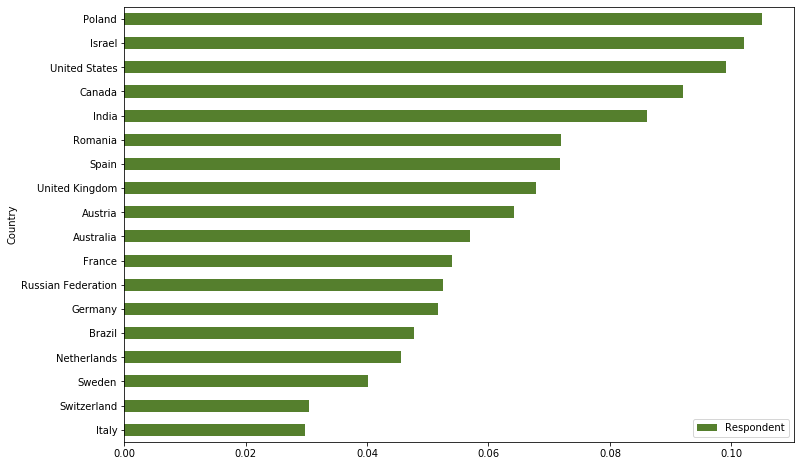

In [25]:
# female respondents as a proportion of all respondents in a country
groups[groups.Gender == 'Female'].sort_values(by = 'Respondent').set_index('Country').plot(kind = 'barh', figsize = (12,8), color='#557f2d')

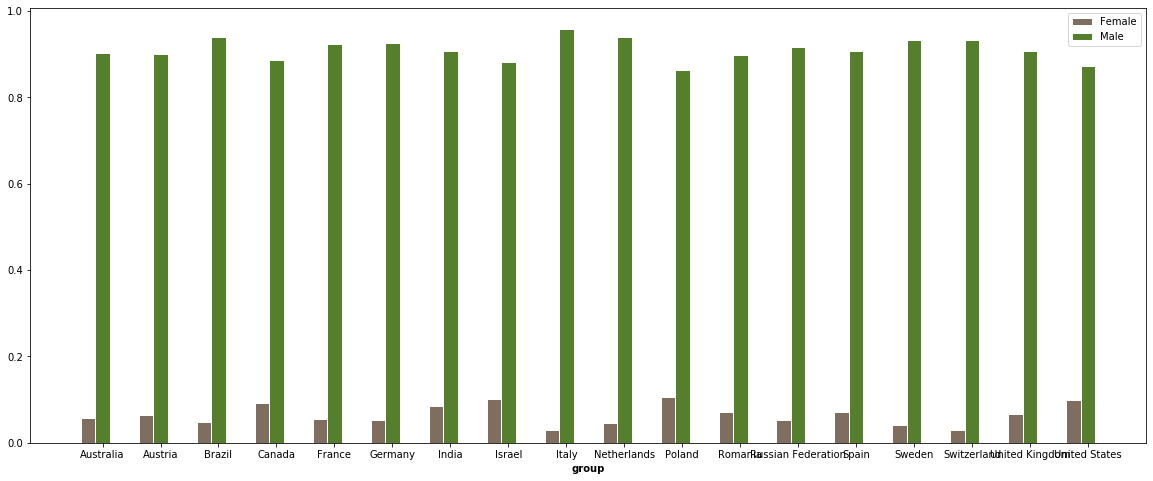

In [26]:
plt.figure(figsize=(20,8))
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = list(groups[groups.Gender == 'Female']['Respondent'])
bars2 = list(groups[groups.Gender == 'Male']['Respondent'])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Female')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Male')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], sorted(list(set(groups['Country']))))
 
# Create legend & Show graphic
plt.legend()
plt.show()


## Gender and Career

In [33]:
def prepare_df(df, column):
    """Outcome: Selected column in the df has no NaN values"""
     # Fill numeric columns with the mean
    if sum(df[column].isna())/df.shape[0]<= 0.3:
        df[column].fillna((df[column].mean()), inplace=True)       
    else:
        df = df.dropna(subset = [column], axis = 0)
    return df

def run_ttest(df, column):
    """Outcome: Selected two values (cat1 and cat2) and compared in the Independent Samples T-Test
    Output: T-test score, and p-value"""
    df = prepare_df(df, column)
    cat1 = df[df['Gender']=='Male']
    cat2 =df[df['Gender']=='Female']

    print(df.shape)
    return ttest_ind(cat1[column], cat2[column])

In [34]:
list_columns = ['JobSatisfaction', 'CareerSatisfaction', 'Salary']

for column in list_columns:
    df_one_var = prepare_df(df, column)
    print("Gender Means for {}".format(column))
    print(df_one_var.groupby('Gender')[column].mean())
#     print(df_one_var['Gender'].value_counts())
    print("T-test Results: {}".format(run_ttest(df_one_var, column)))

Gender Means for JobSatisfaction
Gender
Female    6.946999
Male      7.002643
Others    6.819739
Name: JobSatisfaction, dtype: float64
(35047, 154)
T-test Results: Ttest_indResult(statistic=1.4052392377309995, pvalue=0.15995923669298495)
Gender Means for CareerSatisfaction
Gender
Female    7.210686
Male      7.390825
Others    7.026775
Name: CareerSatisfaction, dtype: float64
(35047, 154)
T-test Results: Ttest_indResult(statistic=5.065005553780798, pvalue=4.1050935015467665e-07)
Gender Means for Salary
Gender
Female    58083.924534
Male      56996.494293
Others    61671.656678
Name: Salary, dtype: float64
(11709, 154)
T-test Results: Ttest_indResult(statistic=-0.7564769929054644, pvalue=0.4493787807516285)


C:\Users\MA069ja\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## How many have answered questions

In [118]:
df[-df.Salary.isnull()].shape[0]/df.shape[0]

0.3340942163380603

## How many have answered questions by gender

In [117]:
# how many provided salary information
df[-df.Salary.isnull()].groupby(['Gender'])['Respondent'].count()/df[-df.Salary.isnull()].shape[0]

Gender
Female    0.069946
Male      0.910923
Others    0.019131
Name: Respondent, dtype: float64

## Ex-coders answers

In [212]:
def return_question_gender_percentage(df, column, title):
    # creating table with raw numbers of gender count in a given column     
    df_gender = df.groupby(['Gender'])[column].count().reset_index()
    
    # creating table with possible answers for the questions by gender   
    df_question = df.groupby(['Gender', column])['Respondent'].count().reset_index()
    
    #  creating flag for 'agree' responses
    df_question[column] = [item.lower() for item in df_question[column]]
    df_question['agree_flag'] = np.where(df_question[column].str.contains ('disagree'), 0, 1  )
    
    #  creating table with gender and flag counts   
    df_question = df_question.groupby(['Gender', 'agree_flag'])['Respondent'].sum().reset_index()
    
    # joining two tables for calculation percentage
    df_joined = df_gender.join(df_question.set_index('Gender'), on = 'Gender', lsuffix= 'df_gender')
    df_joined["Proportion" + column] = df_joined.Respondent / df_joined[column]

    df_joined = df_joined[df_joined.agree_flag == 1]   
    
    return print(df_joined),  df_joined[["Gender", "Proportion" + column]].set_index('Gender').plot(kind = 'bar', figsize=(8,4), title = title)

   Gender  ExCoderReturn  agree_flag  Respondent  ProportionExCoderReturn
0  Female             52           1          31                 0.596154
1    Male            577           1         377                 0.653380
2  Others             20           1          13                 0.650000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1d7e5a1c8>)

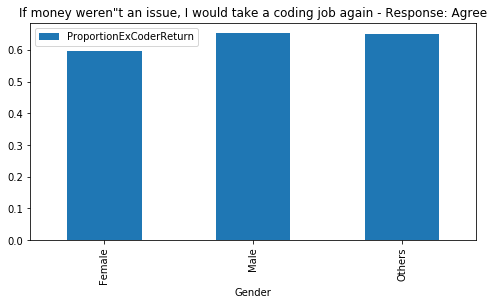

In [213]:
return_question_gender_percentage(df, 'ExCoderReturn', 
                                  'If money weren"t an issue, I would take a coding job again - Response: Agree')

   Gender  ExCoderNotForMe  agree_flag  Respondent  ProportionExCoderNotForMe
0  Female               52           1          15                   0.288462
1    Male              574           1         130                   0.226481
2  Others               20           1           9                   0.450000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1ddd023c8>)

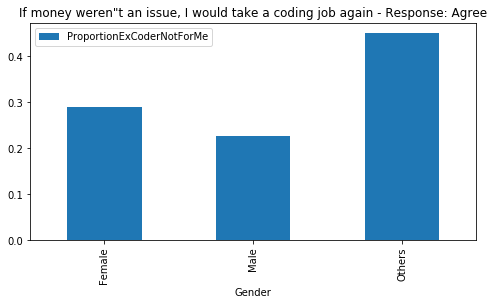

In [201]:
return_question_gender_percentage(df, 'ExCoderNotForMe', 
                                  'If money weren"t an issue, I would take a coding job again - Response: Agree')

   Gender  ExCoderBalance  agree_flag  Respondent  ProportionExCoderBalance
0  Female              51           1          36                  0.705882
1    Male             576           1         305                  0.529514
2  Others              20           1          12                  0.600000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1dddec648>)

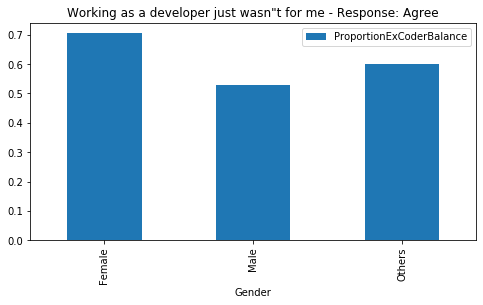

In [203]:
return_question_gender_percentage(df, 'ExCoderBalance', 
                                  'Working as a developer just wasn"t for me - Response: Agree')

   Gender  ExCoderBalance  agree_flag  Respondent  ProportionExCoderBalance
0  Female              51           1          36                  0.705882
1    Male             576           1         305                  0.529514
2  Others              20           1          12                  0.600000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1dc959b08>)

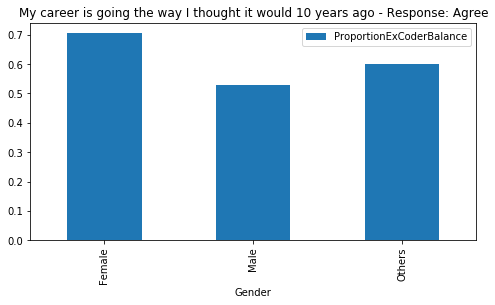

In [204]:
return_question_gender_percentage(df, 'ExCoderBalance', 
                                  'My career is going the way I thought it would 10 years ago - Response: Agree')

   Gender  ExCoderBelonged  agree_flag  Respondent  ProportionExCoderBelonged
0  Female               52           1          22                   0.423077
1    Male              577           1         160                   0.277296
2  Others               20           1          13                   0.650000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1dcc32f48>)

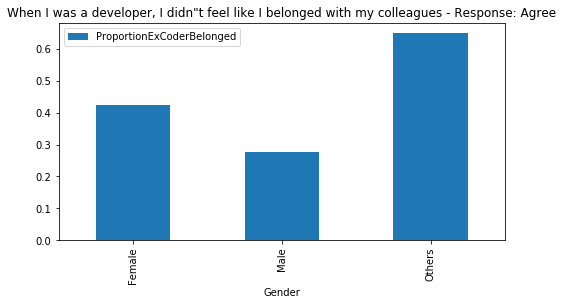

In [205]:
return_question_gender_percentage(df, 'ExCoderBelonged', 
                                  'When I was a developer, I didn"t feel like I belonged with my colleagues - Response: Agree')

   Gender  ExCoderSkills  agree_flag  Respondent  ProportionExCoderSkills
0  Female             52           1          42                 0.807692
1    Male            582           1         374                 0.642612
2  Others             20           1          11                 0.550000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1dcbf1808>)

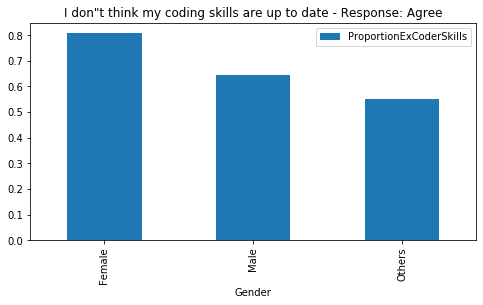

In [206]:
return_question_gender_percentage(df, 'ExCoderSkills', 
                                  'I don"t think my coding skills are up to date - Response: Agree')

   Gender  ExCoderWillNotCode  agree_flag  Respondent  \
0  Female                  50           1          24   
1    Male                 576           1         228   
2  Others                  20           1          12   

   ProportionExCoderWillNotCode  
0                      0.480000  
1                      0.395833  
2                      0.600000  


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1dcb58b48>)

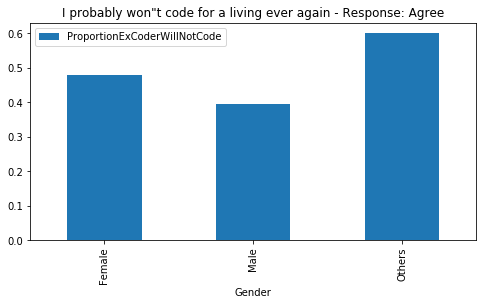

In [207]:
return_question_gender_percentage(df, 'ExCoderWillNotCode', 
                                  'I probably won"t code for a living ever again - Response: Agree')

   Gender  ExCoderActive  agree_flag  Respondent  ProportionExCoderActive
0  Female             52           1          36                 0.692308
1    Male            584           1         431                 0.738014
2  Others             20           1          18                 0.900000


(None, <matplotlib.axes._subplots.AxesSubplot at 0x2a1ddc93708>)

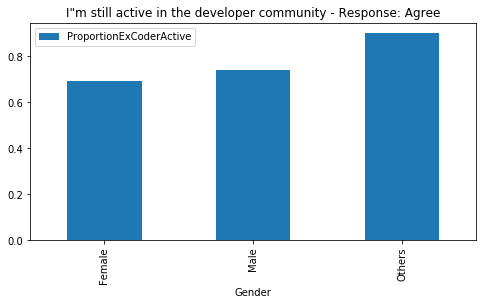

In [208]:
return_question_gender_percentage(df, 'ExCoderActive', 
                                  'I"m still active in the developer community - Response: Agree')

In [209]:
list_questions = ['ProblemSolving', 'BuildingThings', 'LearningNewTech',
       'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI',
       'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers',
       'SeriousWork', 'InvestTimeTools', 'WorkPayCare',
       'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers',
       'ChangeWorld']

   Gender  ProblemSolving  agree_flag  Respondent  ProportionProblemSolving
0  Female            1956           1        1938                  0.990798
1    Male           23186           1       23058                  0.994479
2  Others             633           1         615                  0.971564
   Gender  BuildingThings  agree_flag  Respondent  ProportionBuildingThings
0  Female            1951           1        1932                  0.990261
1    Male           23159           1       22986                  0.992530
2  Others             634           1         621                  0.979495
   Gender  LearningNewTech  agree_flag  Respondent  ProportionLearningNewTech
0  Female             1956           1        1917                   0.980061
1    Male            23193           1       22884                   0.986677
2  Others              630           1         608                   0.965079
   Gender  BoringDetails  agree_flag  Respondent  ProportionBoringDetails
0  Fem

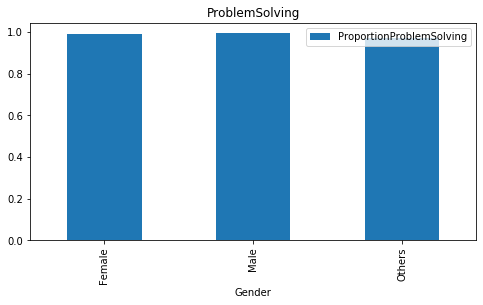

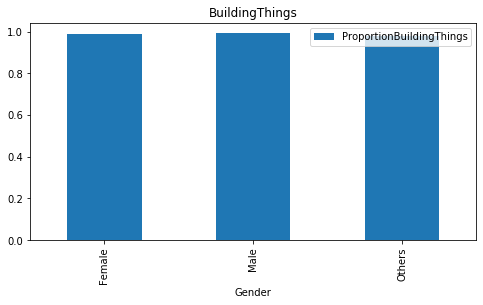

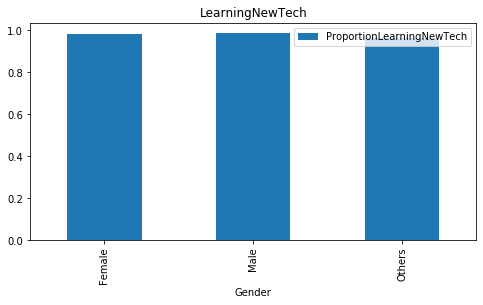

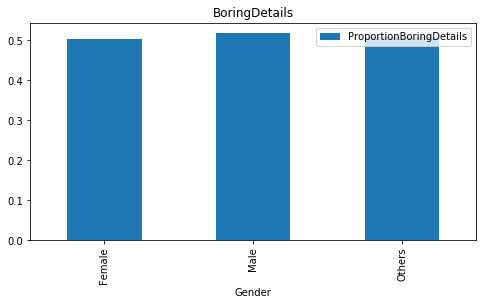

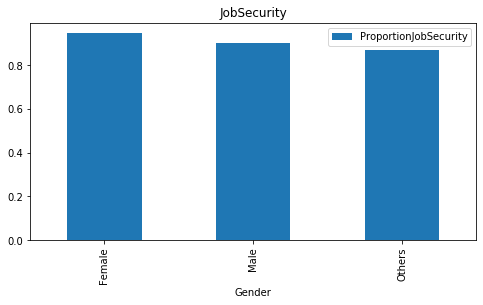

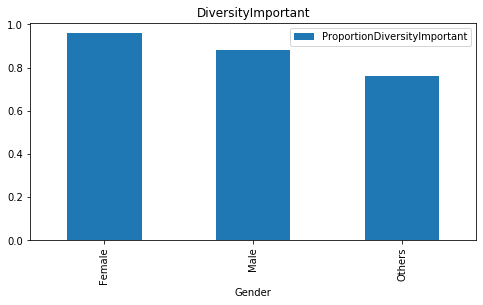

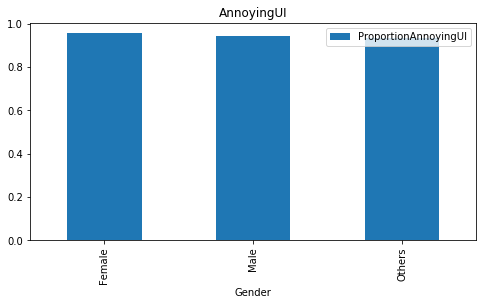

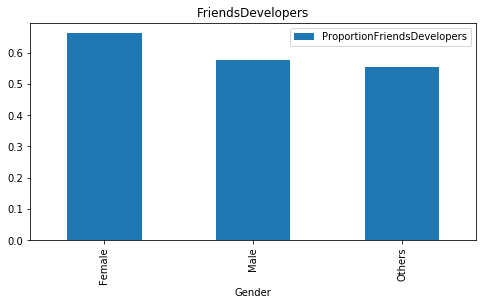

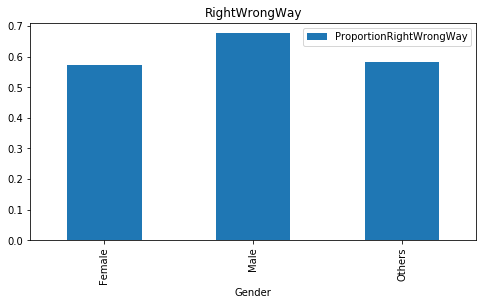

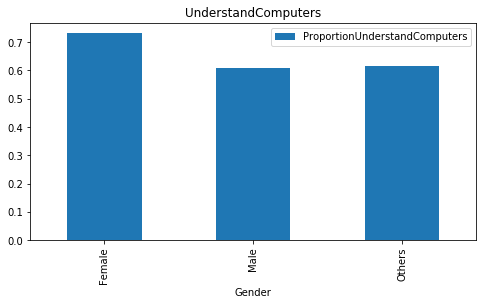

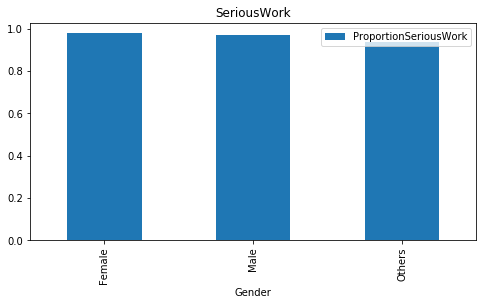

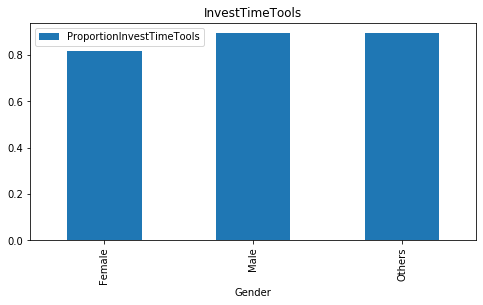

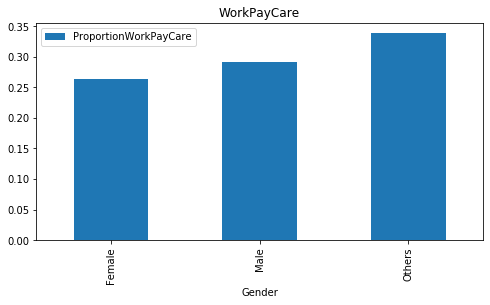

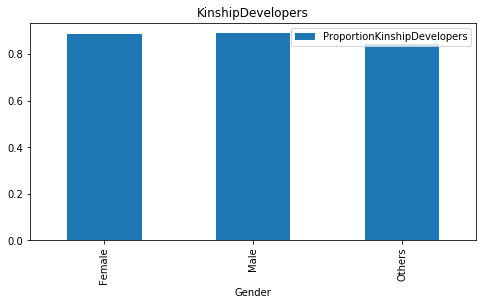

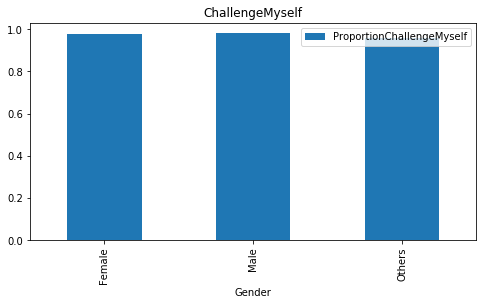

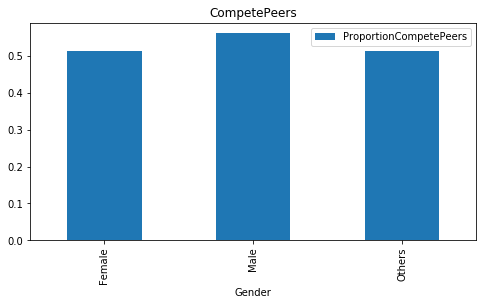

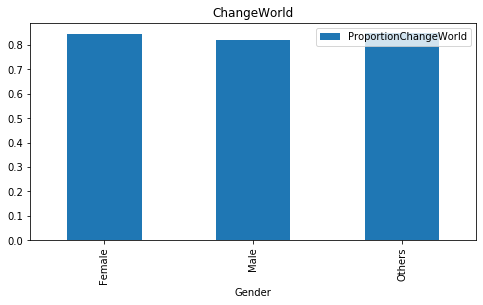

In [210]:
for item in list_questions:
    return_question_gender_percentage(df, item, 
                                  item)